<a href="https://colab.research.google.com/github/heeeeee0129/2022S-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [ ]:
df.head()


,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


In [ ]:
df.shape

(710, 6)

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



=== best parameter === 
 거리척도: MANHATTAN 
 K :  20
(639, 5)
(639,)
final test accuracy =  0.7464788732394366


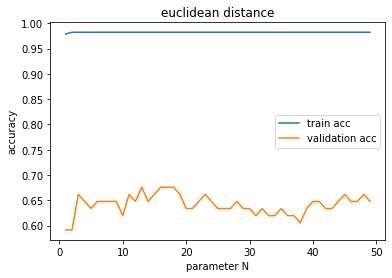

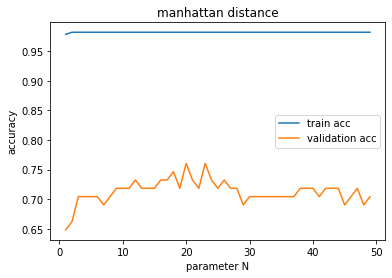

In [ ]:
### 문제 1 ###
## 코드 작성 ##
## 거리 척도: 유클리디안 거리, 맨해튼 거리

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
import pandas as pd

K = range(1, 50)

euclidean_train_acc = []
euclidean_val_acc = []
fig = plt.figure() 
fig.add_subplot(111)
for n in K:
  knn = KNeighborsClassifier(n_neighbors = n, metric = "euclidean", weights = "distance")
  knn.fit(X_train, y_train)
  euclidean_train_acc.append(knn.score(X_train, y_train))
  if n>1:
    if knn.score(X_val, y_val)>max(euclidean_val_acc):
      euclidean_parameter = n
      euclidean_score = knn.score(X_val, y_val)
  else:
    euclidean_score = knn.score(X_val, y_val)
  euclidean_val_acc.append(knn.score(X_val, y_val))

plt.title("euclidean distance")
plt.plot(K, euclidean_train_acc, label = "train acc")
plt.plot(K, euclidean_val_acc, label = "validation acc")
plt.xlabel("parameter N")
plt.ylabel("accuracy")
plt.legend()


manhattan_train_acc = []
manhattan_val_acc = []
fig = plt.figure() 
fig.add_subplot(111)
for n in K:
  knn = KNeighborsClassifier(n_neighbors = n, metric = "manhattan", weights = "distance")
  knn.fit(X_train, y_train)
  manhattan_train_acc.append(knn.score(X_train, y_train))
  if n>1:
    if knn.score(X_val, y_val)>max(manhattan_val_acc):
      manhattan_parameter = n
      manhattan_score = knn.score(X_val, y_val)
  else:
    manhattan_score = knn.score(X_val, y_val)
  manhattan_val_acc.append(knn.score(X_val, y_val))

plt.title("manhattan distance")
plt.plot(K, manhattan_train_acc, label = "train acc")
plt.plot(K, manhattan_val_acc, label = "validation acc")
plt.xlabel("parameter N")
plt.ylabel("accuracy")
plt.legend()

if euclidean_score > manhattan_score:
  print("=== best parameter === \n 거리척도: EUCLIDEAN \n K : ", euclidean_parameter)
  final_distance = "euclidean"
  final_parameter = euclidean_parameter
else:
  print("=== best parameter === \n 거리척도: MANHATTAN \n K : ", manhattan_parameter)
  final_distance = "manhattan"
  final_parameter = manhattan_parameter


X_final_train = pd.concat([X_train,X_val])
print(X_final_train.shape)

y_final_train = pd.concat([y_train, y_val])
print(y_final_train.shape)

knn=KNeighborsClassifier(n_neighbors = final_parameter, metric = final_distance)
knn.fit(X_final_train,y_final_train)
print("final test accuracy = ", knn.score(X_test,y_test))


**설명 작성**  
- 최적의 파라미터: 거리 척도는 manhattan 거리, K는 20.
- 설명: 두 거리척도를 사용하고 각각의 K 값의 경우에 대한 정확도를 모두 비교하여 그 중 가장 높은 정확도를 나타낸 경우의 파라미터 정보를 얻어온다. 위의 실행결과를 살펴보면, manhattan 거리척도와 20의 k 값을 사용하였을 때 validation에서 가장 높은 정확도를 보였음을 알 수 있다.

## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


=== best parameter === 
 kernel: LINEAR 
 C :  0.1
final test accuracy =  0.7605633802816901


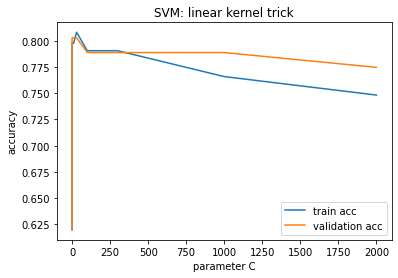

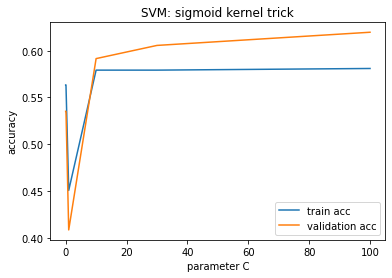

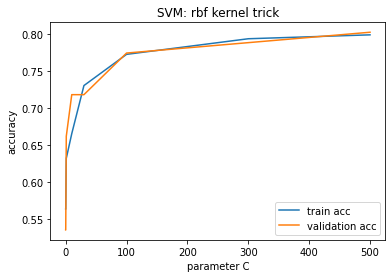

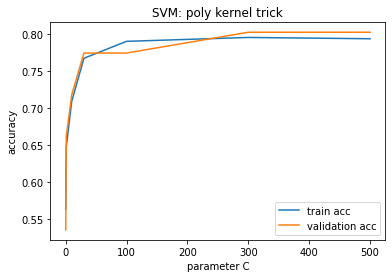

In [ ]:
### 문제 2 ###
## 코드 작성 ##

from sklearn.svm import SVC
import matplotlib.pyplot as plt


fig = plt.figure() 
fig.add_subplot(111)
linear_train_acc = []
linear_val_acc =[]
for n in [0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,1000,2000]:
  svm = SVC(kernel = 'linear', C = n)
  svm.fit(X_train, y_train)
  linear_train_acc.append(svm.score(X_train, y_train))
  if n>0.0001:
    if svm.score(X_val, y_val) > max(linear_val_acc):
      linear_parameter = n
      linear_score = svm.score(X_val, y_val)
  else:
    linear_score = svm.score(X_val, y_val)
  linear_val_acc.append(svm.score(X_val, y_val))
plt.title("SVM: linear kernel trick")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,1000,2000], linear_train_acc, label = "train acc")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,1000,2000], linear_val_acc, label = "validation acc")
plt.xlabel("parameter C")
plt.ylabel("accuracy")
plt.legend()



fig = plt.figure() 
fig.add_subplot(111)
sigmoid_train_acc = []
sigmoid_val_acc =[]
for n in [0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100]:
  svm = SVC(kernel = 'sigmoid', C = n)
  svm.fit(X_train, y_train)
  sigmoid_train_acc.append(svm.score(X_train, y_train))
  if n>0.0001:
    if svm.score(X_val, y_val) > max(sigmoid_val_acc):
      sigmoid_parameter = n
      sigmoid_score = svm.score(X_val, y_val)
  else:
    sigmoid_score = svm.score(X_val, y_val)
  sigmoid_val_acc.append(svm.score(X_val, y_val))
plt.title("SVM: sigmoid kernel trick")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100], sigmoid_train_acc, label = "train acc")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100], sigmoid_val_acc, label = "validation acc")
plt.xlabel("parameter C")
plt.ylabel("accuracy")
plt.legend()



fig = plt.figure() 
fig.add_subplot(111)
rbf_train_acc = []
rbf_val_acc =[]
for n in [0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500]:
  svm = SVC(kernel = 'rbf', C = n)
  svm.fit(X_train, y_train)
  rbf_train_acc.append(svm.score(X_train, y_train))
  if n>0.0001:
    if svm.score(X_val, y_val) > max(rbf_val_acc):
      rbf_parameter = n
      rbf_score = svm.score(X_val, y_val)
  else:
    rbf_score = svm.score(X_val, y_val)
  rbf_val_acc.append(svm.score(X_val, y_val))
plt.title("SVM: rbf kernel trick")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500], rbf_train_acc, label = "train acc")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500], rbf_val_acc, label = "validation acc")
plt.xlabel("parameter C")
plt.ylabel("accuracy")
plt.legend()


fig = plt.figure() 
fig.add_subplot(111)
poly_train_acc = []
poly_val_acc =[]
for n in [0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500]:
  svm = SVC(kernel = 'poly', C = n)
  svm.fit(X_train, y_train)
  poly_train_acc.append(svm.score(X_train, y_train))
  if n>0.0001:
    if svm.score(X_val, y_val) > max(poly_val_acc):
      poly_parameter = n
      poly_score = svm.score(X_val, y_val)
  else:
    poly_score = svm.score(X_val, y_val)
  poly_val_acc.append(svm.score(X_val, y_val))
plt.title("SVM: poly kernel trick")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500], poly_train_acc, label = "train acc")
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10.,30.,100.,300,500], poly_val_acc, label = "validation acc")
plt.xlabel("parameter C")
plt.ylabel("accuracy")
plt.legend()

scores = [linear_score,rbf_score,sigmoid_score, poly_score]
best_score = max(scores)

if best_score == linear_score:
  print("=== best parameter === \n kernel: LINEAR \n C : ", linear_parameter)
  final_kernel = "linear"
  final_parameter = linear_parameter

elif best_score == rbf_score:
  print("=== best parameter === \n kernel: RBF \n C : ", rbf_parameter)
  final_kernel = "rbf"
  final_parameter = rbf_parameter

elif best_score == sigmoid_score:
  print("=== best parameter === \n kernel: sigmoid \n C : ", sigmoid_parameter)
  final_kernel = "sigmoid"
  final_parameter = sigmoid_parameter

else:
  print("=== best parameter === \n kernel: poly \n C : ", poly_parameter)
  final_kernel = "poly"
  final_parameter = poly_parameter

svm = SVC(kernel = final_kernel, C = final_parameter)
svm.fit(X_final_train, y_final_train)
print("final test accuracy = ", svm.score(X_test,y_test))


**설명 작성**  
- 최적의 파라미터:최적의 파라미터는 전체 경우의 Validation accuracy를 비교하였을 때 가장 높은 정확도를 나타낸, kernel = linear, C = 0.1이다. 
- 설명:각 그래프에서는 각각 다른 커널을 사용하였을 때의 경우를 나타내며, 각 그래프의 X축은 파라미터 C 값의 변화를 나타낸다. validation 정확도를 저장할 때에 각 커널별로 가장 높은 정확도와 그 때의 파라미터 C 값을 저장해두고, 전체 커널에 대해 정확도 평가가 끝나고 나면, 각 커널들 중에서 정확도가 가장 높은 경우를 선택하여 최종적으로 최적의 파라미터인 커널과 C 값을 찾아낸다. 



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

=== best parameter === 
 max_tree_depth :  3
final test accuracy =  0.7746478873239436 




/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

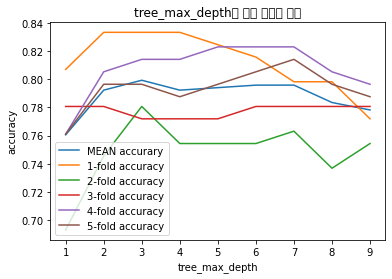

In [ ]:
### 문제 3-1 ###
## 코드 작성 ##

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

mean = []
score = []

tree_max_depth = range(1,10)
for n in tree_max_depth:
  train_acc = []
  test_acc = []
  k_fold = RandomForestClassifier(max_depth = n)
  acc_about_depth = cross_val_score(k_fold, X_train, y_train, cv = 5, scoring="accuracy")
  score.append(acc_about_depth)
  mean.append(acc_about_depth.mean())

fig = plt.figure() 
fig.add_subplot(111)
plt.title("tree_max_depth에 따른 정확도 분석")
plt.plot(tree_max_depth, mean, label = 'MEAN accurary')
plt.plot(tree_max_depth, np.array(score)[:,0], label = '1-fold accuracy')
plt.plot(tree_max_depth, np.array(score)[:,1], label = '2-fold accuracy')
plt.plot(tree_max_depth, np.array(score)[:,2], label = '3-fold accuracy')
plt.plot(tree_max_depth, np.array(score)[:,3], label = '4-fold accuracy')
plt.plot(tree_max_depth, np.array(score)[:,4], label = '5-fold accuracy')
plt.xlabel('tree_max_depth')
plt.ylabel('accuracy')
plt.legend()


for n in tree_max_depth:
  if mean[n-1]==max(mean):
    best_parameter = n
    break

print("=== best parameter === \n max_tree_depth : ", best_parameter)
k_fold = RandomForestClassifier(max_depth = best_parameter)
k_fold.fit(X_final_train, y_final_train)
print("final test accuracy = ", k_fold.score(X_test,y_test), "\n\n")


**설명 작성**  
- test accuracy: 0.7746478873239436 
- 최적의 파라미터: max_tree_depth가 3일 때
- 설명: 5-fold를 통해 validation evaluation을 한 평균을 MEAN accuracy로 나타내어 max_tree_depth 변화에 따른 정확도를 살펴보았을 때 트리의 최대 깊이가 3일 때 가장 높게 나타남을 알 수 있다. 



=== best parameter === 
 max_tree_depth :  4
final test accuracy =  0.7746478873239436 




/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

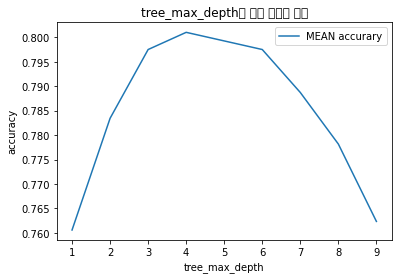

In [ ]:
### 문제 3-2 ###
## 코드 작성 ##

### 문제 3-1 ###
## 코드 작성 ##

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

mean = []
score = []

tree_max_depth = range(1,10)
for n in tree_max_depth:
  train_acc = []
  test_acc = []
  loo = LeaveOneOut()
  k_fold = RandomForestClassifier(max_depth = n)
  acc_about_depth = cross_val_score(k_fold, X_train, y_train, cv = loo, scoring="accuracy")
  score.append(acc_about_depth)
  mean.append(acc_about_depth.mean())

fig = plt.figure() 
fig.add_subplot(111)
plt.title("tree_max_depth에 따른 정확도 분석")
plt.plot(tree_max_depth, mean, label = 'MEAN accurary')
plt.xlabel('tree_max_depth')
plt.ylabel('accuracy')
plt.legend()


for n in tree_max_depth:
  if mean[n-1]==max(mean):
    best_parameter = n
    break

print("=== best parameter === \n max_tree_depth : ", best_parameter)
k_fold = RandomForestClassifier(max_depth = best_parameter)
k_fold.fit(X_final_train, y_final_train)
print("final test accuracy = ", k_fold.score(X_test,y_test), "\n\n")


**설명 작성**  
- test accuracy:0.7746478873239436
- 최적의 파라미터:4
- 설명:LOO를 통해 validation evaluation을 한 평균을 MEAN accuracy로 나타내어 max_tree_depth 변화에 따른 정확도를 살펴보았을 때 트리의 최대 깊이가 4일 때 가장 높게 나타남을 알 수 있다. 



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

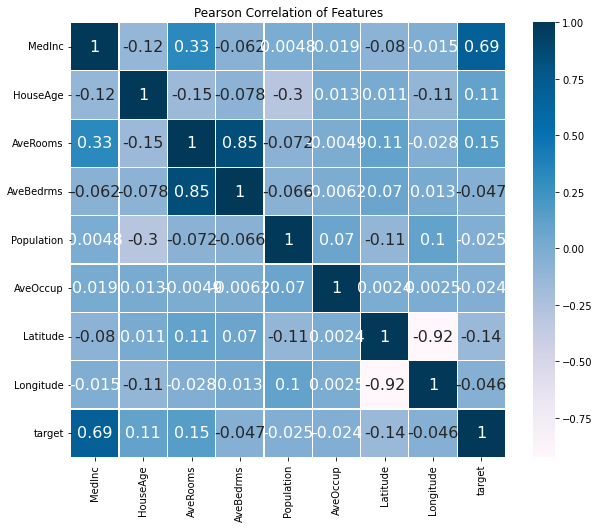

In [ ]:
### 문제 4-1 ###
# correlation map 작성 후 plot

import matplotlib.pyplot as plt 
import seaborn as sns

heatmap_data = df
colormap = plt.cm.PuBu
plt.figure(figsize = (10,8))
plt.title("Pearson Correlation of Features")
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



- **Feature들 간 관계 서술**  
  답: 진한 색을 나타내는 feature 관계를 우선으로 설명함.
  - Longtitude와 Latitude는 강한 반비례관계를 나타냄. 
  - AveBedrms와 AveRooms는 강한 비례관계를 나타냄. 
  - MedInc와 target은 강한 비례관계를 나타냄.
  - Medinc과 Averooms는 적당한 비례관계를 나타냄.
  - HouseAge와 Population은 적당한 반비례 관계를 나타냄.
  나머지 다른 feature들의 관계성은 약하다.

  --> target과 연관성이 높은 순서대로 정렬
      MedInc >> AveRooms > Latitude > HouseAge > AveBedrms > Longitude > Population > AveOccup

- **최종 선택한 feature들**  
  답: 연관성이 가장 낮은 feature 2개를 제거하고 MedInc,AveRooms,Latitude,HouseAge,AveBedrms,Longitude feature들을 최종 선택
  

In [ ]:
### 문제 4-1 ###
# 새 dataframe 만들기 
new_df = df.drop('Population', axis=1)
new_df = new_df.drop('AveOccup', axis=1)
# new_df = new_df.drop('Latitude', axis=1)

X = new_df.drop('target', axis=1)
y = new_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)


X_train's shape :  (18576, 6)
y_train's shape :  (18576,)

X_test's shape :  (2064, 6)
y_test's shape :  (2064,)


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [ ]:
### 문제 4-2 ###
## 코드 작성 ##

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))
print("train set에 대한 mse:  ", mse_train, "\n")
print("test set에 대한 mse:  ", mse_test, "\n")
r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
print("train set에 대한 R2 score:  ", r2_train, "\n")
print("test set에 대한 R2 score:  ", r2_test, "\n")



train set에 대한 mse:   0.5298339782798045 

test set에 대한 mse:   0.49076784118388966 

train set에 대한 R2 score:   0.6024022892338904 

test set에 대한 R2 score:   0.6286299434807822 



**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: mse는 y 실제값과 예측값 사이의 에러에 대해 나타내는 지표로서, 0에 가까울 수록 좋은 결과임을 나타낸다. R2 score는 x에 의해서 설명이 될 수 있는 variance의 비율로서, 0부터 1사이의 값을 나타내며 1에 가까울 수록 좋은 결과임을 나타낸다. 
test set에 대한 mse가 0.49, r2 score가 0.62로 feature들과 결과값 y가 관계성이 있음을 알 수 있으며, 결과 예측이 어느정도 잘 이루어짐을 알 수 있다. 

mse와 r2 score 지표 모두 train에 비해서 test에서 보다 좋은 결과값을 가지는 것을 보아, training error가 test error보다 크기 때문에 overfit하지 않고 variance는 작음을 알 수 있다. 그러나 모델이 심플하기 때문에 mse와 r2 score를 보았을 때 트레이닝 데이터에서의 에러가 큰 것을 보아 underfitting하여 bias가 크다는 것을 알 수 있다. 

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

val_ridge = []
val_lasso = []
alpha = [0.0001, 0.001,0.01,0.1,10]


for a in alpha:
  ridge = Ridge(alpha=a)
  ridge.fit(X_train, y_train)
  val_ridge.append(r2_score(y_val, ridge.predict(X_val)))
  lasso = Lasso(alpha=a, max_iter = 10000)
  lasso.fit(X_train, y_train)
  val_lasso.append(r2_score(y_val, lasso.predict(X_val)))

for i in range(0,5):
  if val_ridge[i] == max(val_ridge):
    best_ridge = alpha[i]
    break
  if val_lasso[i] == max(val_lasso):
    best_lasso = alpha[i]
    break


 ====== BEST PARAMETER ====== 
best_parameter_ridge :  0.0001 
best_parameter_lasso :  0.001


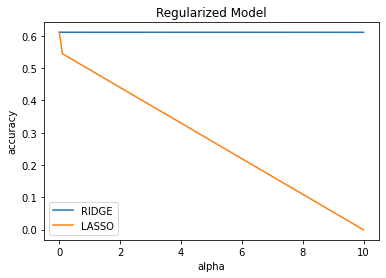

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##

fig = plt.figure() 
fig.add_subplot(111)
plt.title("Regularized Model")
plt.plot(alpha, val_ridge, label = 'RIDGE')
plt.plot(alpha, val_lasso, label = 'LASSO')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

print(" ====== BEST PARAMETER ====== \nbest_parameter_ridge : ", best_ridge, "\nbest_parameter_lasso : ", best_lasso)

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.001

In [ ]:
### 문제 4-3 ###
# 최종 결과 출력
X_final_train = pd.concat([X_train,X_val])
print(X_final_train.shape)

y_final_train = pd.concat([y_train, y_val])
print(y_final_train.shape)

ridge = Ridge(alpha = best_ridge)
ridge.fit(X_final_train, y_final_train)

lasso = Lasso(alpha=best_lasso, max_iter = 10000)
lasso.fit(X_final_train, y_final_train)
 

print("======== final test r2 score ==========\nRIDGE : ", r2_score(y_test, ridge.predict(X_test)), "\nLASSO: ",r2_score(y_test, lasso.predict(X_test)) )

(18576, 6)
(18576,)
======== final test r2 score ==========
RIDGE :  0.5946475833848718 
LASSO:  0.5946540919335734
